## Exercise H4.2: Comparison of gradient descent methods

In [111]:
import numpy as np
from matplotlib import pyplot as plt
import math

### Training Data

In [14]:
data = np.array([[-1, -0.1], [0.3, 0.5], [2, 0.5]])
x = data[:, 0]
y = np.expand_dims(data[:, 1], axis=0)
X = np.vstack([np.ones(3), x])

### Cost function

In [26]:
def cost(w):
    return (X.dot(X.T)).dot(w) - X.dot(y.T)

### Initialization

In [19]:
w = np.expand_dims(np.array([-0.45, 0.2]), axis=1)

(2, 1)


### 1. Gradient Descent

In [105]:
def gradient_descent(w, eta):
    return w - eta*cost(w)

In [106]:
def fit_gd(w, iterations, eta):
    weight_updates = [w]
    w_new = w
    for i in range(0, iterations-1):
        w_new = gradient_descent(w_new, eta)
        weight_updates.append(w_new)
    weight_updates = np.array(weight_updates)
    return weight_updates

weight_updates = fit_gd(w, 100, 0.1)

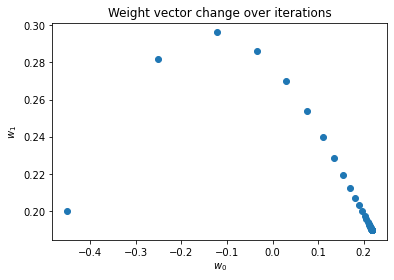

In [107]:
plt.scatter(weight_updates[:, 0], weight_updates[:, 1])
plt.title("Weight vector change over iterations")
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.show()

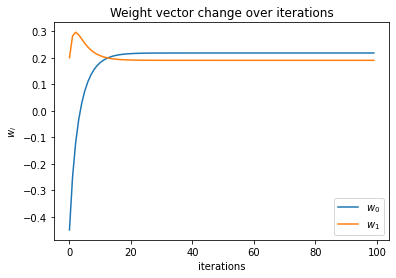

In [104]:
plt.plot(np.linspace(0, 99, 100), weight_updates[:, 0], label="$w_0$")
plt.plot(np.linspace(0, 99, 100), weight_updates[:, 1], label="$w_1$")
plt.title("Weight vector change over iterations")
plt.xlabel("iterations")
plt.ylabel("$w_i$")
plt.legend()
plt.show()

### 2. Line Search

In [122]:
def line_search(w):
    g = cost(w)
    numerator = g.T.dot(g)
    denominator = (g.T.dot(X.dot(X.T))).dot(g)
    eta = numerator / denominator
    return w - eta*cost(w)

def fit_ls(w, iterations):
    weight_updates = [w]
    w_new = w
    for i in range(0, iterations-1):
        w_new = line_search(w_new)
        weight_updates.append(w_new)
    weight_updates = np.array(weight_updates)
    return weight_updates

weight_updates = fit_ls(w, 100)

<ipython-input-122-901d5818b5d7>:5: RuntimeWarning: invalid value encountered in true_divide
  eta = numerator / denominator


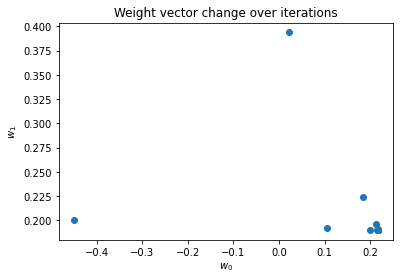

In [123]:
plt.scatter(weight_updates[:, 0], weight_updates[:, 1])
plt.title("Weight vector change over iterations")
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.show()

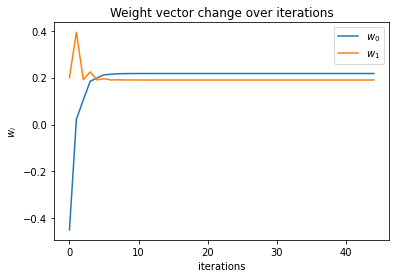

In [124]:
plt.plot(np.linspace(0, 99, 100), weight_updates[:, 0], label="$w_0$")
plt.plot(np.linspace(0, 99, 100), weight_updates[:, 1], label="$w_1$")
plt.title("Weight vector change over iterations")
plt.xlabel("iterations")
plt.ylabel("$w_i$")
plt.legend()
plt.show()

### 3. Conjugate Gradient

In [137]:
def conjugate_gradient(w, d):
    # compute eta
    g = cost(w)
    numerator = d.T.dot(g)
    denominator = (d.T.dot(X.dot(X.T))).dot(d)
    eta = -(numerator / denominator)
    # compute new w
    w_new = w + eta * d
    
    # calc new gradient
    g_new = (X.dot(X.T)).dot(w_new) - X.dot(y.T)
    beta = -((g_new.T.dot(g_new)) / g.T.dot(g))
    # calc new conjugate direction
    d_new = g_new + beta*d

    return w_new, d_new

def fit_cg(w, iterations):
    weight_updates = [w]
    # init
    d = - cost(w)
    w_new = - cost(w)
    
    for i in range(0, iterations-1):
        w_new, d = conjugate_gradient(w_new, d)
        weight_updates.append(w_new)
        
    weight_updates = np.array(weight_updates)
    
    return weight_updates

weight_updates = fit_cg(w, 100)

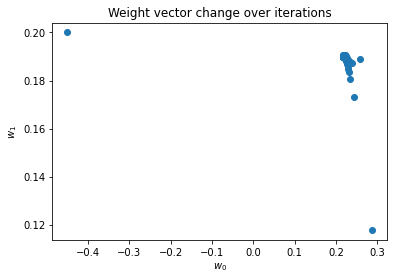

In [138]:
plt.scatter(weight_updates[:, 0], weight_updates[:, 1])
plt.title("Weight vector change over iterations")
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.show()

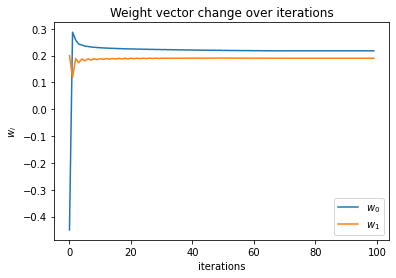

In [139]:
plt.plot(np.linspace(0, 99, 100), weight_updates[:, 0], label="$w_0$")
plt.plot(np.linspace(0, 99, 100), weight_updates[:, 1], label="$w_1$")
plt.title("Weight vector change over iterations")
plt.xlabel("iterations")
plt.ylabel("$w_i$")
plt.legend()
plt.show()